# Importing the Libraries


In [14]:
import pandas as pd
import numpy as np
np.random.seed(0)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Loading the dataset

In [15]:
data = data = pd.read_csv(r"drebin-215-dataset-5560malware-9476-benign.csv", low_memory=False)
print("Total missing values : ", sum(list(data.isna().sum())))

Total missing values :  0


# Count the number of unique classes

In [16]:
classes, count = np.unique(data['class'], return_counts=True)
print(classes, count)

['B' 'S'] [9476 5560]


# Encode the labels

In [17]:
lbl_enc = LabelEncoder()
data = data.replace(classes, lbl_enc.fit_transform(classes))

# Remove missing values and convert data type to numeric

In [18]:
data = data.replace('[?,S]', np.NaN, regex=True)
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])
data

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


# Plot class distribution

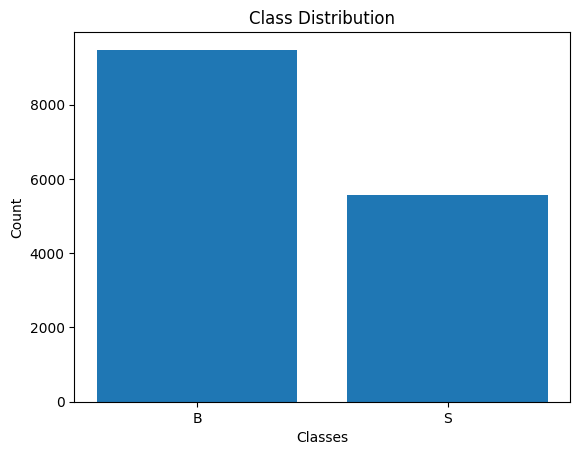

In [19]:
plt.bar(classes, count)
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

# Prepare the data for training and testing

In [20]:
X = data[data.columns[:len(data.columns)-1]].to_numpy()
y = data[data.columns[-1]].to_numpy()
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)

# Create and fit the logistic regression model

In [22]:
print("Train features : ",train_x.shape)
print("Train labels : ",train_y.shape)
print("Test Features : ",test_x.shape)
print("Test labels : ",test_y.shape)

Train features :  (12024, 215)
Train labels :  (12024,)
Test Features :  (3007, 215)
Test labels :  (3007,)


In [24]:
lrclassifier = LogisticRegression(solver='sag', random_state=0)
lrclassifier.fit(train_x, train_y)
y_pred = lrclassifier.predict(test_x)
y_pred

C:\Users\nukna\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([1, 1, 0, ..., 1, 0, 0])

# Threshold the predictions and calculate performance metrics

In [26]:
#Here we are iterating through the predicted values and assigning them to either 1 or 0 based on the threshold of 0.5.
#If the predicted value is greater than 0.5, then it is assigned as 1, otherwise it is assigned as 0.

for i in range(len(y_pred)):
    if y_pred[i] > (1-y_pred[i]):
        y_pred[i]=1
    else:
        y_pred[i]=0
#Here we are printing the evaluation metrics such as precision, recall, F1-score, and accuracy of the model.
#These metrics are calculated by comparing the predicted labels with the true labels of the test set.

print("Precision : ", precision_score(test_y, y_pred) * 100)
print("Recall : ", recall_score(test_y, y_pred) * 100)
print("F1 Score : ", f1_score(test_y, y_pred) * 100)
print("Accuracy of the model: ", metrics.accuracy_score(test_y, y_pred))

Precision :  97.82403027436139
Recall :  96.00742804085422
F1 Score :  96.90721649484536
Accuracy of the model:  0.9780512138343864


# Plot confusion matrix

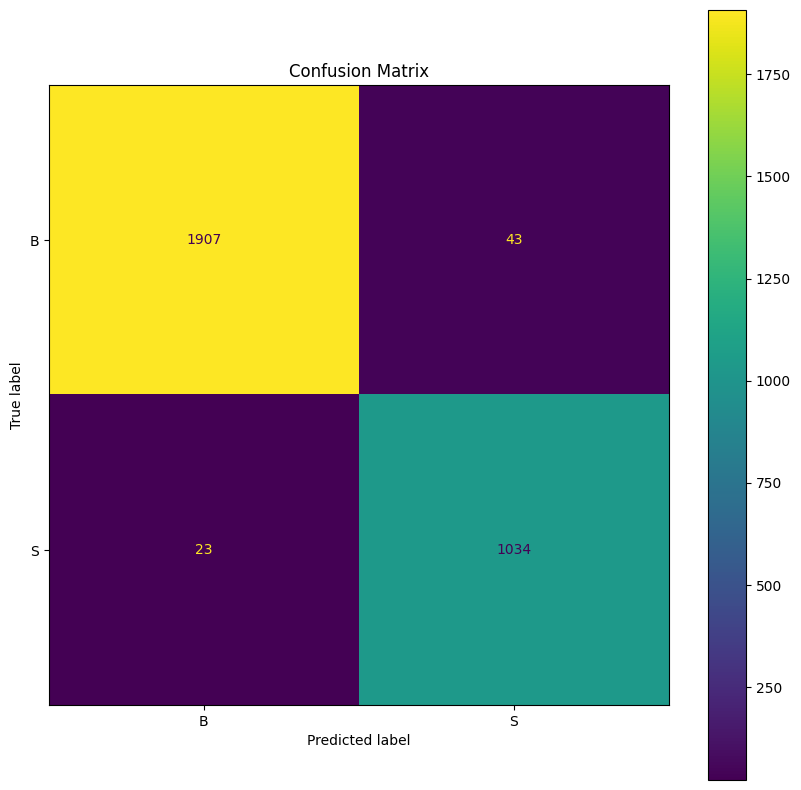

In [27]:
classes = ["B", "S"]

# Create confusion matrix using predicted and actual values
cm = confusion_matrix(y_pred, test_y)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()


# Print classification report

In [28]:
#This code prints the classification report which includes precision, recall, f1-score, and support for each class in the test set, as well as the macro average and weighted average of these metrics.
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1930
           1       0.98      0.96      0.97      1077

    accuracy                           0.98      3007
   macro avg       0.98      0.97      0.98      3007
weighted avg       0.98      0.98      0.98      3007

